In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
df = pd.read_csv(r'C:\Users\Nikki\Downloads\UNSW_Dataset1.csv')
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [26]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df["attack_cat"]=lb.fit_transform(df["attack_cat"])
df["proto"]=lb.fit_transform(df["proto"])
df["service"]=lb.fit_transform(df["service"])
df["state"]=lb.fit_transform(df["state"])
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0
5,6,0.380537,113,0,2,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,6,0
6,7,0.637109,113,0,2,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,6,0
7,8,0.521584,113,0,2,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,6,0
8,9,0.542905,113,0,2,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,6,0
9,10,0.258687,113,0,2,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,6,0


In [27]:
x = df.iloc[:, 0:43].values
x

array([[1.000000e+00, 1.214780e-01, 1.130000e+02, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.000000e+00, 6.499020e-01, 1.130000e+02, ..., 1.000000e+00,
        6.000000e+00, 0.000000e+00],
       [3.000000e+00, 1.623129e+00, 1.130000e+02, ..., 2.000000e+00,
        6.000000e+00, 0.000000e+00],
       ...,
       [1.753390e+05, 9.000000e-06, 1.190000e+02, ..., 3.000000e+00,
        1.200000e+01, 0.000000e+00],
       [1.753400e+05, 9.000000e-06, 1.190000e+02, ..., 3.000000e+01,
        3.000000e+01, 0.000000e+00],
       [1.753410e+05, 9.000000e-06, 1.190000e+02, ..., 3.000000e+01,
        3.000000e+01, 0.000000e+00]])

In [60]:
labels = df['attack_cat'].tolist()
labels

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [31]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

[4 0 0 ... 1 1 1]


In [32]:
kmeans5.cluster_centers_

array([[ 6.37389736e+04,  1.50218710e+00,  1.13000000e+02,
         2.38718812e+00,  1.97553027e+00,  3.90902388e+01,
         4.12043597e+01,  1.67637395e+04,  3.30448205e+04,
         8.89031369e+02,  1.30230325e+02,  1.69765187e+02,
         4.59649536e+05,  1.45066432e+06,  1.00994283e+01,
         1.53967516e+01,  1.34438768e+02,  1.73993379e+02,
         1.22900397e+04,  1.36885687e+03,  2.54983598e+02,
         1.05296744e+09,  3.28728454e+09,  2.55000000e+02,
         9.00312310e-02,  4.55992450e-02,  4.44319859e-02,
         1.72400652e+02,  2.63398942e+02,  2.25997756e-01,
         6.29496383e+03,  3.88048298e+00,  6.56942886e-01,
         2.49740877e+00,  1.40257520e+00,  1.06443340e+00,
         2.70577550e+00,  3.37660950e-02,  3.37660950e-02,
         3.14900892e-01,  3.28882834e+00,  3.47902976e+00,
        -1.24900090e-16],
       [ 1.04215656e+05,  1.26400331e+00,  1.07128437e+02,
         1.06105552e+00,  2.63364715e+00,  5.80671838e+00,
         2.95743778e+00,  1.59

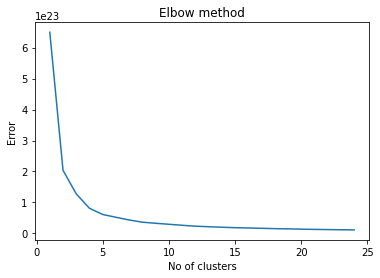

In [7]:
Error =[]
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 25), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [33]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[0 0 0 ... 1 1 1]


In [34]:
kmeans3.cluster_centers_

array([[ 6.37302191e+04,  1.49919433e+00,  1.13000000e+02,
         2.37570614e+00,  1.97446282e+00,  3.98307581e+01,
         4.17974566e+01,  1.72404215e+04,  3.32497860e+04,
         8.85740696e+02,  1.29663864e+02,  1.68999020e+02,
         4.55561271e+05,  1.43481545e+06,  1.04797637e+01,
         1.55102278e+01,  1.28303222e+02,  1.68913778e+02,
         1.15208962e+04,  1.34634920e+03,  2.54982150e+02,
         2.01786306e+09,  3.21139184e+09,  2.54989888e+02,
         9.01031345e-02,  4.58991369e-02,  4.42039976e-02,
         1.74047154e+02,  2.64539015e+02,  2.27900018e-01,
         5.21174422e+03,  3.88031057e+00,  6.54319395e-01,
         2.53248897e+00,  1.40658292e+00,  1.05922563e+00,
         2.69791317e+00,  3.28887972e-02,  3.28887972e-02,
         3.02318983e-01,  3.28998891e+00,  3.51445817e+00,
        -1.31838984e-16],
       [ 1.01899257e+05,  1.28051701e+00,  1.07493137e+02,
         1.14271831e+00,  2.59244759e+00,  8.10923226e+00,
         5.40814475e+00,  3.01

In [43]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(x, y_kmeans3)}')

Silhouette Score(n=3): 0.6749445999541118


In [62]:
from sklearn import metrics
print("Adjusted Rand Index: %0.3f" %metrics.adjusted_rand_score(labels, y_kmeans3))
print("Adjusted Mutual Information: %0.3f" %metrics.adjusted_mutual_info_score(labels, y_kmeans3))

Adjusted Rand Index: 0.059
Adjusted Mutual Information: 0.109


In [44]:
col=df.columns[0:43]
col

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components = 2)
df['x'] = pca.fit_transform(df[col])[:,0]
df['y'] = pca.fit_transform(df[col])[:,1]
df = df.reset_index()
df.head()

,index,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,x,y
0,0,1,0.121478,113,0,2,6,4,258,172,...,0,0,0,1,1,0,6,0,6.279233e+08,-1.118485e+09
1,1,2,0.649902,113,0,2,14,38,734,42014,...,0,0,0,1,6,0,6,0,1.808776e+09,-1.175009e+09
2,2,3,1.623129,113,0,2,8,16,364,13186,...,0,0,0,2,6,0,6,0,2.221904e+09,-6.007516e+08
3,3,4,1.681642,113,3,2,12,12,628,770,...,1,1,0,2,1,0,6,0,1.554388e+08,4.181703e+07
4,4,5,0.449454,113,0,2,10,6,534,268,...,0,0,0,2,39,0,6,0,1.751914e+09,3.230289e+08


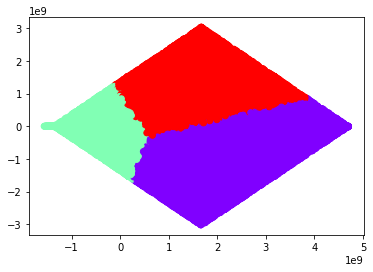

In [47]:
plt.scatter(df['x'], df['y'], c=y_kmeans3, cmap='rainbow')

In [48]:
kmeans10 = KMeans(n_clusters=10)
y_kmeans10 = kmeans10.fit_predict(x)
print(y_kmeans10)

[7 2 1 ... 0 0 0]


In [49]:
kmeans10.cluster_centers_

array([[ 1.05082813e+05,  1.25682558e+00,  1.06992741e+02,
         1.03087485e+00,  2.64873542e+00,  5.13677621e+00,
         2.16248170e+00,  1.29856577e+03,  1.63089622e+03,
         1.68237446e+05,  2.15843374e+02,  7.68639507e+00,
         1.29692752e+08,  1.31964801e+05,  3.64299056e-01,
         6.86809026e-01,  1.64970399e+03,  2.91486705e+01,
         3.52880162e+02,  4.55011665e+01,  9.39240749e+00,
         8.02845328e+06,  7.89260896e+06,  7.20626988e+00,
         1.87988424e-03,  9.53246252e-04,  9.26637993e-04,
         1.06237084e+02,  2.04345701e+01,  8.34974002e-03,
         2.82454551e+02,  1.35173911e+01,  1.79019638e+00,
         9.04246555e+00,  8.45128982e+00,  6.63176334e+00,
         1.33839568e+01,  9.08677874e-04,  9.08677874e-04,
         7.14826594e-03,  9.81712353e+00,  1.34441012e+01,
         2.78661215e-02],
       [ 6.45520817e+04,  1.50023658e+00,  1.13000000e+02,
         2.39336321e+00,  1.97674700e+00,  3.99421097e+01,
         4.36829357e+01,  1.79

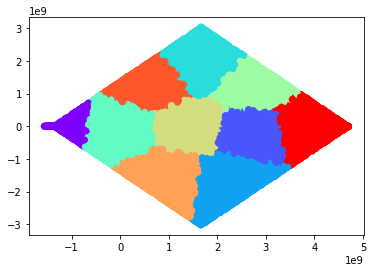

In [50]:
plt.scatter(df['x'], df['y'], c=y_kmeans10, cmap='rainbow')

In [51]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=10): {silhouette_score(x, y_kmeans10)}')

Silhouette Score(n=10): 0.660761642061466


In [61]:
from sklearn import metrics
print("Adjusted Rand Index: %0.3f" %metrics.adjusted_rand_score(labels, y_kmeans10))
print("Adjusted Mutual Information: %0.3f" %metrics.adjusted_mutual_info_score(labels, y_kmeans10))

Adjusted Rand Index: 0.054
Adjusted Mutual Information: 0.104


In [64]:
d = pd.DataFrame(y_kmeans10)

In [65]:
d.value_counts()

0    99035
2    10093
4     9578
7     9052
6     8910
1     8247
9     7958
3     7958
5     7291
8     7219
dtype: int64

In [66]:
df['attack_cat'].value_counts()

6    56000
5    40000
3    33393
4    18184
2    12264
7    10491
0     2000
1     1746
8     1133
9      130
Name: attack_cat, dtype: int64